In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from bread.data import Features, Segmentation, Lineage
import bread.algo.tracking as tracking
import bread.vis as vis
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import torch_geometric

In [3]:
seg = Segmentation.from_h5('../../data/data_from_LPBS/colony005_segmentation.h5')
feat = Features(seg, nn_threshold=12)

# Build cellgraph

Extract node and edge features

In [4]:
graph, df_x, df_e = tracking.build_cellgraph(feat, time_id=100, return_df=True)

In [5]:
df_x

,cell_id,area,r_equiv,r_maj,r_min,angle,ecc
0,1,4123.5,36.370828,37.970253,34.838776,1.186472,0.397671
1,2,5199.0,40.748755,43.136539,38.493145,3.039086,0.451332
2,3,1953.0,25.059181,27.510977,22.825891,1.187307,0.558208
3,4,2138.5,26.250004,29.636539,23.250444,0.505781,0.620104
4,5,3062.0,31.278170,31.443424,31.113785,3.031038,0.144420
5,6,2019.5,25.441195,26.642551,24.294010,0.537110,0.410524
6,7,3471.5,33.416872,34.482830,32.383865,3.101195,0.343562
7,8,1982.0,25.271773,26.258291,24.322317,0.228102,0.376856
8,9,1488.5,21.922918,22.155476,21.692801,0.685456,0.203298
9,10,1237.0,19.922814,21.230564,18.695618,0.228494,0.473862


In [6]:
df_e

,cell_id1,cell_id2,cmtocm_x,cmtocm_y,cmtocm_len,cmtocm_angle,contour_dist
0,1,2,-62.668399,-54.275559,82.904551,-2.427840,2.828427
1,1,3,57.795830,-10.663952,58.771403,-0.182459,2.000000
2,1,4,7.198670,61.049329,61.472282,1.453423,2.236068
3,1,6,52.785312,39.811841,66.115594,0.646198,2.828427
4,1,7,-65.603711,14.746680,67.240698,2.920484,2.236068
5,1,9,27.643688,-49.577610,56.763658,-1.062149,2.236068
6,2,1,62.668399,54.275559,82.904551,0.713753,2.828427
7,2,5,-18.451560,-65.213456,67.773556,-1.846530,2.828427
8,2,7,-2.935311,69.022238,69.084625,1.613298,2.000000
9,3,1,-57.795830,10.663952,58.771403,2.959134,2.000000


In [7]:
print(graph)

DiGraph with 13 nodes and 38 edges


In [8]:
graph.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13))

In [9]:
graph.edges

OutEdgeView([(1, 2), (1, 3), (1, 4), (1, 6), (1, 7), (1, 9), (2, 1), (2, 5), (2, 7), (3, 1), (3, 6), (3, 9), (3, 12), (4, 1), (4, 6), (4, 8), (4, 10), (5, 2), (6, 1), (6, 3), (6, 4), (6, 10), (6, 13), (7, 1), (7, 2), (8, 4), (8, 11), (9, 1), (9, 3), (9, 12), (10, 4), (10, 6), (10, 13), (11, 8), (12, 3), (12, 9), (13, 6), (13, 10)])

In [10]:
graph.edges[(1,2)]

{'cmtocm_x': -62.66839930758377,
 'cmtocm_y': -54.275558542867486,
 'cmtocm_len': 82.90455070088132,
 'cmtocm_angle': -2.4278397102326994,
 'contour_dist': 2.8284271247461903}

In [11]:
graph.nodes[1]

{'area': 4123.5,
 'r_equiv': 36.37082793584819,
 'r_maj': 37.970252990722656,
 'r_min': 34.838775634765625,
 'angle': 1.1864723540922535,
 'ecc': 0.39767085726783197}

In [12]:
graph.edges

OutEdgeView([(1, 2), (1, 3), (1, 4), (1, 6), (1, 7), (1, 9), (2, 1), (2, 5), (2, 7), (3, 1), (3, 6), (3, 9), (3, 12), (4, 1), (4, 6), (4, 8), (4, 10), (5, 2), (6, 1), (6, 3), (6, 4), (6, 10), (6, 13), (7, 1), (7, 2), (8, 4), (8, 11), (9, 1), (9, 3), (9, 12), (10, 4), (10, 6), (10, 13), (11, 8), (12, 3), (12, 9), (13, 6), (13, 10)])

(<Figure size 400x400 with 1 Axes>, <AxesSubplot:>)

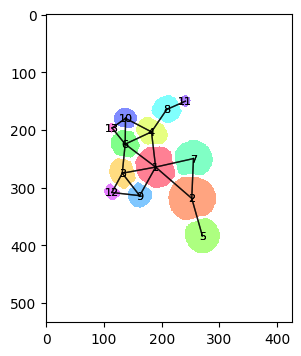

In [13]:
figax = vis.plot_segmentation(seg, 100, alpha=0.5)
vis.plot_cellids(seg, 100, figax=figax)
vis.plot_graph(seg, 100, graph.edges, figax=figax)

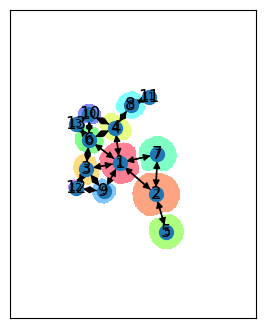

In [14]:
figax = vis.plot_segmentation(seg, 100, alpha=0.5)
nx.draw_networkx(graph,
	pos={ cell_id: cm[[1,0]] for cell_id, cm in zip(seg.cell_ids(100), seg.cms(100)) },
	node_size=100,
	ax=figax[1])

# Build assignment graph

**Testing for correctness**

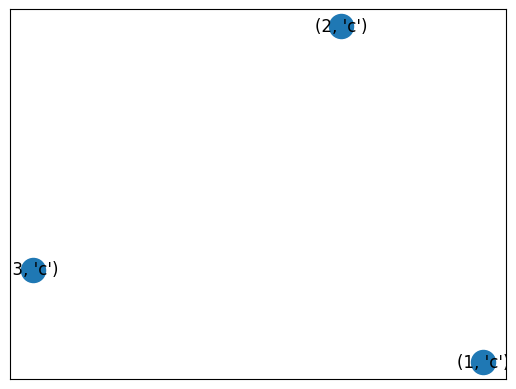

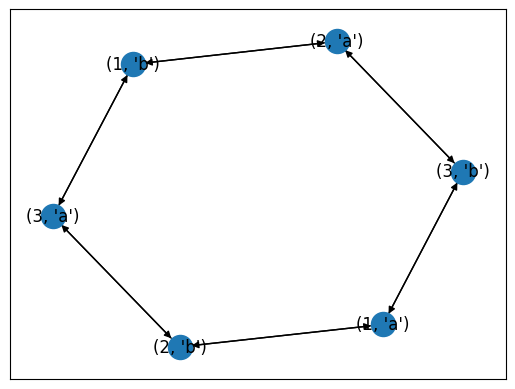

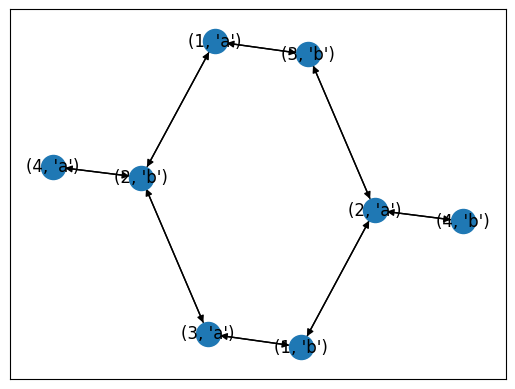

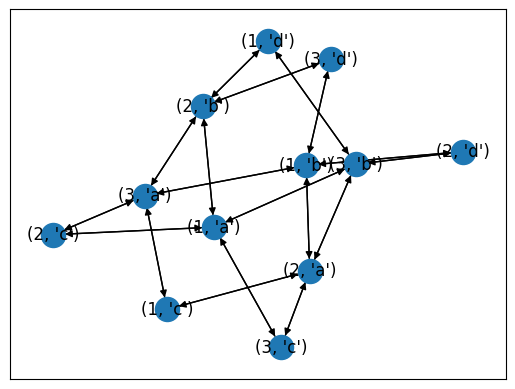

In [15]:
g_isol = nx.Graph()
g_isol.add_nodes_from(['c'])
for g1, g2 in (
	(
		nx.Graph([(1, 2), (2, 3), (3, 1)]).to_directed(),
		g_isol.to_directed()
	),
	(
		nx.Graph([(1, 2), (2, 3), (3, 1)]).to_directed(),
		nx.Graph([('a', 'b')]).to_directed(),
	),
	(
		nx.Graph([(1, 2), (2, 3), (3, 1), (2, 4)]).to_directed(),
		nx.Graph([('a', 'b')]).to_directed(),
	),
	(
		nx.Graph([(1, 2), (1, 3), (2, 3)]).to_directed(),
		nx.Graph([('a', 'b'), ('a', 'c'), ('b', 'a'), ('b', 'd')]).to_directed(),
	),
):
	ga = tracking.build_assgraph(g1, g2)
	nx.draw_networkx(ga, pos=nx.spring_layout(ga, seed=10))
	plt.show()

**Real scenario test**

In [16]:
g1 = tracking.build_cellgraph(feat, 100)
g2 = tracking.build_cellgraph(feat, 101)
ga = tracking.build_assgraph(g1, g2, include_target_feature=True)

In [17]:
g1.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13))

In [18]:
g2.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14))

In [19]:
print(g1, g2, sep='\n')
print(ga)

DiGraph with 13 nodes and 38 edges
DiGraph with 14 nodes and 40 edges
DiGraph with 182 nodes and 1520 edges


In [20]:
ga.nodes[(8, 11)]  # cell 8 in first frame, cell 11 in second frame

{'area_1': 1982.0,
 'r_equiv_1': 25.27177252920413,
 'r_maj_1': 26.258291244506836,
 'r_min_1': 24.322317123413086,
 'angle_1': 0.22810241052637714,
 'ecc_1': 0.3768559157913531,
 'area_2': 357.0,
 'r_equiv_2': 10.715117968324732,
 'r_maj_2': 11.433597564697266,
 'r_min_2': 10.041787147521973,
 'angle_2': 1.6728791363164575,
 'ecc_2': 0.4781648144834072,
 'y': 0}

In [21]:
ga.nodes[(11, 8)]  # cell 11 in first frame, cell 8 in second frame

{'area_1': 346.5,
 'r_equiv_1': 10.613295745504013,
 'r_maj_1': 11.312235832214355,
 'r_min_1': 9.957540512084961,
 'angle_1': 1.4187748359737942,
 'ecc_1': 0.47451924022351794,
 'area_2': 1851.0,
 'r_equiv_2': 24.327099926287687,
 'r_maj_2': 25.666370391845703,
 'r_min_2': 23.05771255493164,
 'angle_2': 2.9752908935295226,
 'ecc_2': 0.43925421649002594,
 'y': 0}

In [30]:
ga.nodes[(11, 11)]  # cell 11 in first frame, cell 11 in second frame
# this is correct ! (y == 1)

{'area_1': 346.5,
 'r_equiv_1': 10.613295745504013,
 'r_maj_1': 11.312235832214355,
 'r_min_1': 9.957540512084961,
 'angle_1': 1.4187748359737942,
 'ecc_1': 0.47451924022351794,
 'area_2': 357.0,
 'r_equiv_2': 10.715117968324732,
 'r_maj_2': 11.433597564697266,
 'r_min_2': 10.041787147521973,
 'angle_2': 1.6728791363164575,
 'ecc_2': 0.4781648144834072,
 'y': 1}

In [22]:
ga.edges[((1, 2), (2, 7))]  # track 1 -> 2 and 2 -> 7

{'cmtocm_x_1': -62.66839930758377,
 'cmtocm_y_1': -54.275558542867486,
 'cmtocm_len_1': 82.90455070088132,
 'cmtocm_angle_1': -2.4278397102326994,
 'contour_dist_1': 2.8284271247461903,
 'cmtocm_x_2': -3.3681490237755156,
 'cmtocm_y_2': 68.86157132162685,
 'cmtocm_len_2': 68.94389336793986,
 'cmtocm_angle_2': 1.619669259154257,
 'contour_dist_2': 2.0}

In [23]:
ga.edges[((2, 7), (1, 2))]  # track 2 -> 7 and 1 -> 2

{'cmtocm_x_1': 62.66839930758377,
 'cmtocm_y_1': 54.275558542867486,
 'cmtocm_len_1': 82.90455070088132,
 'cmtocm_angle_1': 0.7137529433570937,
 'contour_dist_1': 2.8284271247461903,
 'cmtocm_x_2': 3.3681490237755156,
 'cmtocm_y_2': -68.86157132162685,
 'cmtocm_len_2': 68.94389336793986,
 'cmtocm_angle_2': -1.5219233944355361,
 'contour_dist_2': 2.0}

**Interface between pytorch and actual trackings**

In [39]:
tga, node_attrs, edge_attrs = tracking.to_data(ga)
print(tga, node_attrs, edge_attrs, sep='\n')

Data(edge_index=[2, 1520], y=[182, 1], x=[182, 12], edge_attr=[1520, 10])
['area_1', 'r_equiv_1', 'r_maj_1', 'r_min_1', 'angle_1', 'ecc_1', 'area_2', 'r_equiv_2', 'r_maj_2', 'r_min_2', 'angle_2', 'ecc_2']
['cmtocm_x_1', 'cmtocm_y_1', 'cmtocm_len_1', 'cmtocm_angle_1', 'contour_dist_1', 'cmtocm_x_2', 'cmtocm_y_2', 'cmtocm_len_2', 'cmtocm_angle_2', 'contour_dist_2']


In [40]:
tga.edge_index

tensor([[  0,   0,   0,  ..., 180, 181, 181],
        [ 15,  16,  17,  ..., 135,  78, 134]])

In [41]:
tganode_to_nxnode = { node_idx: node_ids for node_idx, node_ids in zip(range(len(tga.x)), ga.nodes) }
for node_idx, node_ids in tganode_to_nxnode.items():
	assert tracking.to_node_ids(node_idx, g1, g2) == node_ids

In [47]:
# Simulate a tracking result
# Nodes of the assignment graph get binary classified
ass = np.zeros(tga.x.shape[0]).reshape((g1.number_of_nodes(), g2.number_of_nodes()))
ass

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [46]:
ass_gt = tga.y.reshape((g1.number_of_nodes(), g2.number_of_nodes()))
ass_gt

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])